<a href="https://colab.research.google.com/github/samssiq/tcc/blob/main/visu_tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TCC - Experimentos com o klue.



## 1º Cenário:
#### Conseguir alocar todos os pods e sobrar recursos

No arquivo ```infrastructure_description.json```, foram determinados os seguintes recursos:


```
"status": {
                "capacity": {
                    "cpu": "2",
                    "memory": "4Gi",
                    "pods": "100",
                    "ephemeral-storage": "100Gi"
                },
                "allocatable": {
                    "cpu": "2",
                    "memory": "4Gi",
                    "pods": "100",
                    "ephemeral-storage": "100Gi"

````

Enquanto isso, no arquivo ```workload_description.json```, os requests necessários para os containeres foram:



```
"containers": [
                  {
                    "name": "fake-container",
                    "image": "fake-image",
                    "resources": {
                      "requests": {
                        "cpu": "100m",
                        "memory": "64Mi"
```



A emulação a ser rodada no ```workload_description.json``` possui as seguintes configurações:



```
"emulation": [
    {
        "timestamp": 300,
        "applied_objects": {},
        "deleted_objects": [],
        "scaled_replicasets": [
            {
                "name": "experiment-tcc",
                "namespace": "experiment-tcc",
                "pods": 15,
                "kind": "deployment"
            },
            {
              "timestamp": 600,
              "applied_objects": {},
              "deleted_objects": [
                {
                  "name": "experiment-tcc",
                 "namespace": "experiment-tcc"
                }
              ],
              "scaled_replicasets": []
```



O esperado é rodar a emulação por 10 minutos e verificar a quantidade de *pending pods*, o QoS escolhido. Idealmente, após a emulação, não deve existir nenhum pod com esse estado, pois há recursos de sobra para atender as demandas dos pods.

### Resultados:
Após a emulação configurada como mostrado acima, os resultados não foram satisfatórios e fugiram do esperado. Investigações estão sendo feitas para entender o que causou os seguintes comportamentos:

In [5]:
!pip install -q git+https://github.com/maxmcz/learntools.git

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.plotting.register_matplotlib_converters()
%matplotlib inline

df = pd.read_csv('/content/cen1_kube_pod_status_phase.csv')

df.head()

  Preparing metadata (setup.py) ... done


,name,timestamp,value,__name__,container,instance,job,namespace,phase,pod,uid
0,kube_pod_status_phase,1753847091,0,kube_pod_status_phase,kube-rbac-proxy-main,10.244.0.5:8443,kube-state-metrics,experiment-tcc,Failed,otel-o11y-ob3-af-beta-opentelemetry-collector-...,42148726-89f7-40b4-94b8-a1c4a18bcc9d
1,kube_pod_status_phase,1753847121,0,kube_pod_status_phase,kube-rbac-proxy-main,10.244.0.5:8443,kube-state-metrics,experiment-tcc,Failed,otel-o11y-ob3-af-beta-opentelemetry-collector-...,42148726-89f7-40b4-94b8-a1c4a18bcc9d
2,kube_pod_status_phase,1753847151,0,kube_pod_status_phase,kube-rbac-proxy-main,10.244.0.5:8443,kube-state-metrics,experiment-tcc,Failed,otel-o11y-ob3-af-beta-opentelemetry-collector-...,42148726-89f7-40b4-94b8-a1c4a18bcc9d
3,kube_pod_status_phase,1753847181,0,kube_pod_status_phase,kube-rbac-proxy-main,10.244.0.5:8443,kube-state-metrics,experiment-tcc,Failed,otel-o11y-ob3-af-beta-opentelemetry-collector-...,42148726-89f7-40b4-94b8-a1c4a18bcc9d
4,kube_pod_status_phase,1753847211,0,kube_pod_status_phase,kube-rbac-proxy-main,10.244.0.5:8443,kube-state-metrics,experiment-tcc,Failed,otel-o11y-ob3-af-beta-opentelemetry-collector-...,42148726-89f7-40b4-94b8-a1c4a18bcc9d


In [8]:
filtered_df = df[df['value'] == 1] ## Vai filtrar todas as linhas com o valor 1, ou seja o estado real do pod

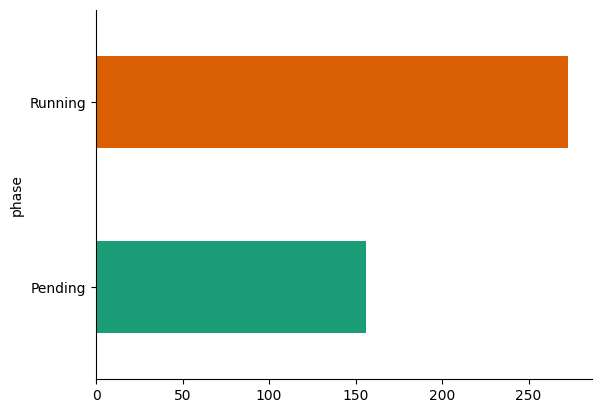

In [9]:
# @title phase

from matplotlib import pyplot as plt
import seaborn as sns
filtered_df.groupby('phase').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
cen1_filepath = "cen1_kube_pod_status_phase.csv"

cn1_data = filtered_df
#pd.read_csv(cen1_filepath, index_col="name", parse_dates=True)

<Axes: xlabel='phase', ylabel='timestamp'>

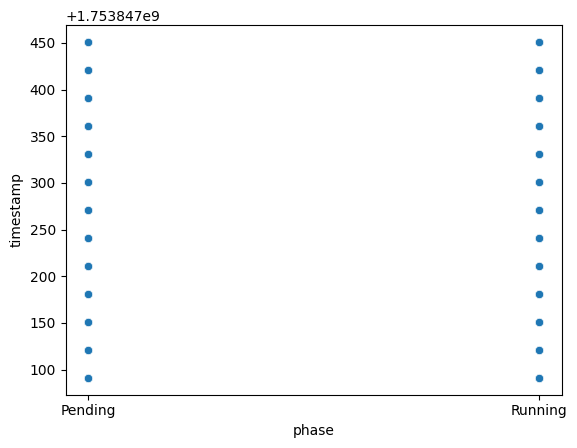

In [15]:
sns.scatterplot(x=cn1_data['phase'], y=cn1_data['timestamp'])

# 2º Cenário:
#### Conseguir alocar todos os pods e não sobrar recursos